In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [12]:
tf.__version__

'2.3.0'

In [14]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

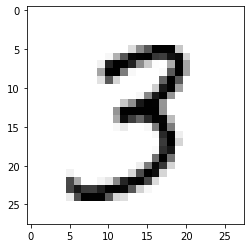

In [17]:
%matplotlib inline
image_index = np.random.randint(0, 60000)
plt.imshow(x_train[image_index], cmap='Greys')

In [18]:
print(y_train[image_index])

3


In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
from tensorflow.keras.utils import to_categorical
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [21]:
print(x_train.shape)

(60000, 28, 28, 1)


In [22]:
print(x_train.shape[0])
print(x_test.shape[0])

60000
10000


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1448 - accuracy: 0.9547
Epoch 2/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0499 - accuracy: 0.9849
Epoch 3/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0335 - accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0268 - accuracy: 0.9918
Epoch 5/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0213 - accuracy: 0.9929
Epoch 6/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0174 - accuracy: 0.9947
Epoch 7/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0152 - accuracy: 0.9949
Epoch 8/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0127 - accuracy: 0.9957
Epoch 9/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0107 - accuracy: 0.9967
Epoch 10/10
1875/1875 [==============================] - 75s 40m

In [27]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0262 - accuracy: 0.9929


[0.02623441070318222, 0.992900013923645]

9


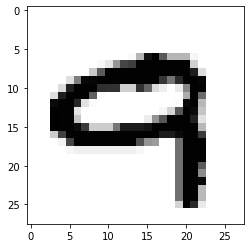

In [28]:
image_index = np.random.randint(0, 10000)
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())